<h1 align="center">The Bechdel Test</h1>
<img src="img/The_Bechdel_Test.png">

The Bechdel Test is a litmus test for female presence in fictional media. The test is named for Alison Bechdel, creator of the comic strip Dykes to Watch Out For, who made it known to the world with this strip.

In order to pass, the film or show must meet the following criteria:

    It includes at least two women,note 
    who have at least one conversation,note 
    about something other than a man or men.

### Links about the Bechdel test

<a href="https://en.wikipedia.org/wiki/Bechdel_test">wikipedia: The Bechdel Test</a><br>
<a href="https://tvtropes.org/pmwiki/pmwiki.php/UsefulNotes/TheBechdelTest">TV Tropes Wiki: The Bechdel Test</a>


In [1]:
import urllib, json
import pandas as pd
import seaborn as sns

df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [2]:
df.head()

,rating,imdbid,id,title,year
0,0,3155794,9602,Passage de Venus,1874
1,0,14495706,9804,La Rosace Magique,1877
2,0,2221420,9603,Sallie Gardner at a Gallop,1878
3,0,12592084,9806,Le singe musicien,1878
4,0,7816420,9816,Athlete Swinging a Pick,1881


In [3]:
dfnew = df[df['year']>=1967] # 
dfnew

,rating,imdbid,id,title,year
1293,1,0061512,301,Cool Hand Luke,1967
1294,1,0061852,493,"Jungle Book, The",1967
1295,2,0061722,616,"Graduate, The",1967
1296,1,0063278,2054,Marketa Lazarova,1967
1297,3,0061418,2083,Bonnie and Clyde,1967
...,...,...,...,...,...
9903,3,12844910,10728,Pathaan,2023
9904,3,10855768,10754,Missing,2023
9905,2,10365998,10737,Infinity Pool,2023
9906,3,14209916,10779,Cocaine Bear,2023


In [4]:
dfnew.rename(columns={'rating':'Bechdel score'}, inplace=True)

/home/karel/anaconda3/envs/work/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
dfnew['year'] = pd.to_datetime(dfnew['year'],format='%Y')

/home/karel/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
dfnew['Bechdel score'] = dfnew['Bechdel score'].astype('category', copy=False)

/home/karel/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Bechdel score', ylabel='count'>

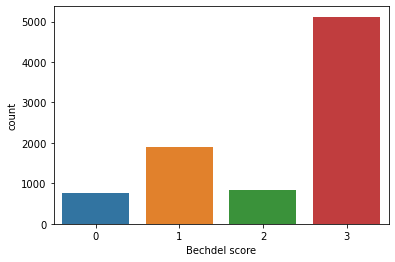

In [7]:
sns.countplot(x = 'Bechdel score', data= dfnew)

In [8]:
li = []
for i in dfnew['Bechdel score']:
    if i < 3:
        li.append(0)
    else:
        li.append(1)
dfnew['pass BS test'] = li

dfnew

/home/karel/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Bechdel score,imdbid,id,title,year,pass BS test
1293,1,0061512,301,Cool Hand Luke,1967-01-01,0
1294,1,0061852,493,"Jungle Book, The",1967-01-01,0
1295,2,0061722,616,"Graduate, The",1967-01-01,0
1296,1,0063278,2054,Marketa Lazarova,1967-01-01,0
1297,3,0061418,2083,Bonnie and Clyde,1967-01-01,1
...,...,...,...,...,...,...
9903,3,12844910,10728,Pathaan,2023-01-01,1
9904,3,10855768,10754,Missing,2023-01-01,1
9905,2,10365998,10737,Infinity Pool,2023-01-01,0
9906,3,14209916,10779,Cocaine Bear,2023-01-01,1


<AxesSubplot:xlabel='pass BS test', ylabel='count'>

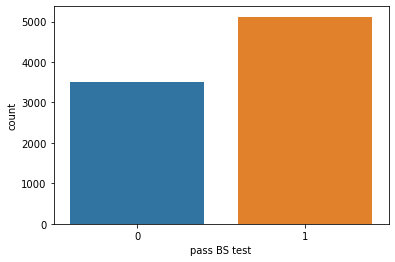

In [9]:
sns.countplot(x = 'pass BS test', data = dfnew)

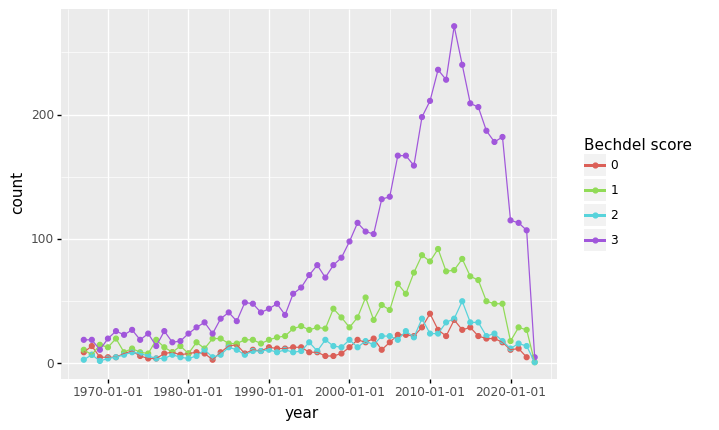

<ggplot: (8768422111801)>

In [10]:
from plotnine import *

(ggplot(dfnew)+geom_point(aes('year',color=dfnew['Bechdel score']),stat='count',show_legend=True)+geom_line(aes('year',color=dfnew['Bechdel score']),stat='count',show_legend=True))

In [11]:
dfMovies = pd.read_csv('movies_metadata.csv')

In [12]:
dfMovies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415,NaN,NaN,NaN,NaN
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45457,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,Released,Rising and falling between a man and woman,Subdue,False,4,1,NaN,NaN,NaN,NaN
45458,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9,3,NaN,NaN,NaN,NaN
45459,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,Released,A deadly game of wits.,Betrayal,False,3.8,6,NaN,NaN,NaN,NaN
45460,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,Released,NaN,Satan Triumphant,False,0,0,NaN,NaN,NaN,NaN


In [13]:
dfmerge = pd.merge(dfnew,dfMovies,how='left',on='id')

In [14]:
print(dfMovies.columns)
dfnew.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')


Index(['Bechdel score', 'imdbid', 'id', 'title', 'year', 'pass BS test'], dtype='object')

In [15]:
dfnew.loc[df['id'] == 10280]

,Bechdel score,imdbid,id,title,year,pass BS test
9767,3,8115900,10280,"Bad Guys, The",2022-01-01,1
